<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day006_affine_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from google.colab import drive, output
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
!cp -r drive/'My Drive'/教學/發布/23_CV/Data_Day1/ .
!mv Data_Day1 data

import cv2
import time
import numpy as np

img = cv2.imread('data/lena.png')

Mounted at /content/drive


Case 1 @ sample code

[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]
[[  1.   0. 100.]
 [  0.   1. -50.]]


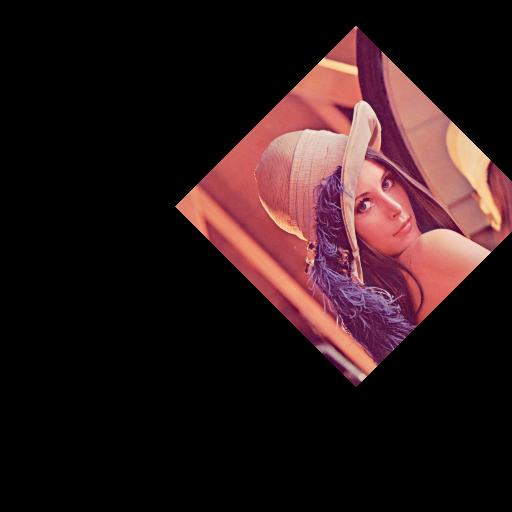

In [11]:
t1 = cv2.getRotationMatrix2D((img.shape[0]//2, img.shape[1]//2), 45, 0.5)
print(t1)
t2 = np.array([[1,0,100],[0,1,-50]], dtype=np.float32)
print(t2)
img_rotation = cv2.warpAffine(img,t1,(img.shape[0], img.shape[1]))
img_rotation = cv2.warpAffine(img_rotation, t2,(img.shape[0],img.shape[1]))
cv2_imshow(img_rotation)

## Affine Transformation - Case 2: any three point

In [ ]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = 
img_affine = 

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
while True:
    cv2.imshow('affine transformation', img_show_affine)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break